In [1]:
import pandas as pd
import numpy as np
import scipy.stats as si

In [2]:
RF = 0.07 # Riskless rate

In [3]:
# Asset A
mean1 = 0.1 # Exp Return
vol1 = 0.1 # Std Deviation
varia1 = vol1**2 # Variance

In [4]:
# Asset B
mean2 = 0.15 # Exp Return
vol2 = 0.2 # Std Deviation
varia2 = vol2**2 # Variance

In [5]:
Corr = 0.2 # Correlation
cov = vol1*vol2*Corr # Covariance

In [6]:
M_Weight_A = 0.564 # % in Asset A for the Market Portfolio (M)
print("The % in Asset A is:", "{:.1%}".format(M_Weight_A))

The % in Asset A is: 56.4%


# Market Portfolio (M)

In [7]:
M_Weight_B = 1-M_Weight_A # % in Asset B for the Market Portfolio (M)
print("The % in Asset B is:", "{:.1%}".format(M_Weight_B))
M_mean = M_Weight_A*mean1+M_Weight_B*mean2 # Exp return, M
print("The Market Portfolio Exp return is:", "{:.2%}".format(M_mean))
M_vol = np.sqrt((M_Weight_A*vol1)**2+(M_Weight_B*vol2)**2+2*(M_Weight_A*M_Weight_B)*cov) # Volatility, M
print("The Market Portfolio Volatility is:", "{:.2%}".format(M_vol))

The % in Asset B is: 43.6%
The Market Portfolio Exp return is: 12.18%
The Market Portfolio Volatility is: 11.29%


# Building the Efficient Frontier

In [8]:
Weight_A1 = np.linspace(-0.5,0.4,10)
Weight_A1 = list(Weight_A1)
Weight_A1

[-0.5,
 -0.4,
 -0.3,
 -0.19999999999999996,
 -0.09999999999999998,
 0.0,
 0.10000000000000009,
 0.20000000000000007,
 0.30000000000000004,
 0.4]

In [9]:
Weight_A2 = np.linspace(M_Weight_A,(M_Weight_A+1.1),12)
Weight_A2 = list(Weight_A2)
Weight_A2

[0.564,
 0.6639999999999999,
 0.764,
 0.864,
 0.964,
 1.064,
 1.1640000000000001,
 1.264,
 1.3639999999999999,
 1.464,
 1.564,
 1.6640000000000001]

In [10]:
Weight_A = Weight_A1 + Weight_A2
Weight_A

[-0.5,
 -0.4,
 -0.3,
 -0.19999999999999996,
 -0.09999999999999998,
 0.0,
 0.10000000000000009,
 0.20000000000000007,
 0.30000000000000004,
 0.4,
 0.564,
 0.6639999999999999,
 0.764,
 0.864,
 0.964,
 1.064,
 1.1640000000000001,
 1.264,
 1.3639999999999999,
 1.464,
 1.564,
 1.6640000000000001]

In [11]:
VOL = []
for i in range(0,len(Weight_A)):
    VOL.append(np.sqrt((Weight_A[i]*vol1)**2+(1-Weight_A[i])**2*vol2**2+2*Weight_A[i]*(1-Weight_A[i])*cov))
    

MEAN = []
for i in range(0,len(Weight_A)):
    MEAN.append(Weight_A[i]*mean1+(1-Weight_A[i])*mean2)

SRP = []
for i in range(0,len(Weight_A)):
    SRP.append(((Weight_A[i]*mean1+(1-Weight_A[i])*mean2)-RF)/(np.sqrt((Weight_A[i]*vol1)**2+(1-Weight_A[i])**2*vol2**2+2*Weight_A[i]*(1-Weight_A[i])*cov)))

In [12]:
df = pd.DataFrame({"% in Asset A": Weight_A, "Standard Deviation":VOL, "Expected Return": MEAN , "Sharpe Ratio": SRP})
df

,% in Asset A,Standard Deviation,Expected Return,Sharpe Ratio
0,-0.500,0.294109,0.1750,0.357011
1,-0.400,0.274809,0.1700,0.363889
2,-0.300,0.255695,0.1650,0.371536
3,-0.200,0.236812,0.1600,0.380048
4,-0.100,0.218220,0.1550,0.389515
5,0.000,0.200000,0.1500,0.400000
6,0.100,0.182264,0.1450,0.411492
7,0.200,0.165167,0.1400,0.423815
8,0.300,0.148930,0.1350,0.436448
9,0.400,0.133866,0.1300,0.448211


# Building the CML

In [13]:
Weight_M1 = np.linspace(0,0.9,10)
Weight_M1 = list(Weight_M1)
Weight_M1

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [14]:
Weight_M2 = np.linspace(1.0,3.0,9)
Weight_M2 = list(Weight_M2)
Weight_M2

[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]

In [15]:
Weight_M = Weight_M1 + Weight_M2
Weight_M

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0]

In [16]:
VOLM = []
for i in range(0,len(Weight_M)):
    VOLM.append(Weight_M[i]*M_vol)

MEANM = []
for i in range(0,len(Weight_M)):
    MEANM.append(Weight_M[i]*M_mean+(1-Weight_M[i])*RF)

In [17]:
df1 = pd.DataFrame({"% in Market Portfolio": Weight_M, "Standard Deviation":VOLM, "Expected Return(CML)": MEANM})
df1

,% in Market Portfolio,Standard Deviation,Expected Return(CML)
0,0.00,0.000000,0.07000
1,0.10,0.011292,0.07518
2,0.20,0.022585,0.08036
3,0.30,0.033877,0.08554
4,0.40,0.045170,0.09072
5,0.50,0.056462,0.09590
6,0.60,0.067755,0.10108
7,0.70,0.079047,0.10626
8,0.80,0.090340,0.11144
9,0.90,0.101632,0.11662


In [18]:
df['Standard Deviation'][:14]

0     0.294109
1     0.274809
2     0.255695
3     0.236812
4     0.218220
5     0.200000
6     0.182264
7     0.165167
8     0.148930
9     0.133866
10    0.112925
11    0.103487
12    0.097505
13    0.095629
Name: Standard Deviation, dtype: float64

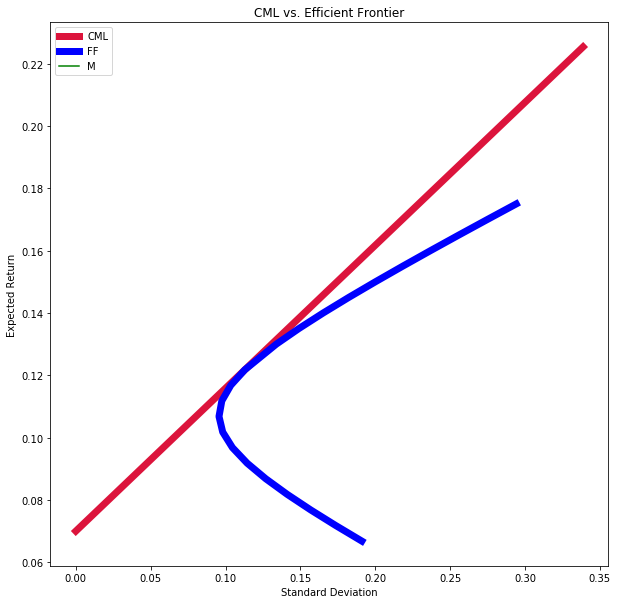

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
CML = plt.plot(df1['Standard Deviation'], df1['Expected Return(CML)'], label='CML', color = 'crimson', linewidth = 7.0)
EF = plt.plot(df['Standard Deviation'], df['Expected Return'], label='FF', color = 'blue', linewidth = 7.0)
Portfolio = plt.plot(M_vol, M_mean, label='M', color = 'green')
plt.title('CML vs. Efficient Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.legend()
plt.show()